# Main Program
<li> I. Data Processing
<li> II. Data Visualization
<li> III. Modelling
<li> IV. GUI


## I. Data Processing (Tweets Part)
<li> Read the tweets data from csv file, and rename each column
<li> Convert Date into Datetime
<li> Read Stockprice data from file
<li> Merge Tweets and Stock Price Data into One Frame
<li> Get Rid of ASCII Punctuations and Numbers, Word Tokenizing
<li> Count Word Frequency
<li> Draw Word Frequency Histogram
<li> Keep Words whose Frequency is Between 2 and 100

(1) Read the Tweets from CSV file, and Rename Each Column

In [29]:
import pandas as pd
import datetime
datafile = './data/25073877_Donald J. Trump_tweets.csv'
df_raw = pd.read_csv(datafile,header=None,names = ['tweetid','date','content','rt','like','repo','id','name','followers'])


(2) Convert Date into Datetime

In [30]:
df_raw['date'] = df_raw['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [31]:
df_raw

,tweetid,date,content,rt,like,repo,id,name,followers
0,1068887938761662465,2018-12-01 15:21:58,"....However, out of respect for the Bush Famil...",False,74159,13171,25073877,Donald J. Trump,56041345
1,1068887935838228480,2018-12-01 15:21:57,I was very much looking forward to having a pr...,False,73022,13950,25073877,Donald J. Trump,56041345
2,1068826073775964160,2018-12-01 11:16:08,"President George H.W. Bush led a long, success...",False,198901,30521,25073877,Donald J. Trump,56041345
3,1068743940755660800,2018-12-01 05:49:46,Statement from President Donald J. Trump and F...,False,97203,26057,25073877,Donald J. Trump,56041345
4,1068705471970902018,2018-12-01 03:16:54,"RT @EPN: En mi último día como Presidente, me ...",False,0,10023,25073877,Donald J. Trump,56041345
5,1068704815587438593,2018-12-01 03:14:18,RT @AbeShinzo: アルゼンチンでＧ２０サミットが開幕しました。この機会を活かし、...,False,0,9858,25073877,Donald J. Trump,56041345
6,1068704589699002368,2018-12-01 03:13:24,RT @TheBlueHouseENG: President Moon (@moonrive...,False,0,7969,25073877,Donald J. Trump,56041345
7,1068687025505595392,2018-12-01 02:03:36,Watch @seanhannity on @FoxNews NOW. Enjoy!,False,52042,9798,25073877,Donald J. Trump,56041345
8,1068661832578158592,2018-12-01 00:23:30,"Great day at the #G20Summit in Buenos Aires, A...",False,75894,17609,25073877,Donald J. Trump,56041345
9,1068601345949687808,2018-11-30 20:23:09,Great reviews on the USMCA - sooo much better ...,False,59967,12486,25073877,Donald J. Trump,56041345


(3) Read stockprice data from file

In [38]:
datafile1 = './data/_1min_new.csv'
datafile3 = './data/_3min_new.csv'
datafile5 = './data/_5min_new.csv'
datafile10 = './data/_10min_new.csv'
datafile15 = './data/_15min_new.csv'
datafile30 = './data/_30min_new.csv'
df1 = pd.read_csv(datafile1,index_col=0)
df3 = pd.read_csv(datafile3,index_col=0)
df5 = pd.read_csv(datafile5,index_col=0)
df10 = pd.read_csv(datafile10,index_col=0)
df15 = pd.read_csv(datafile15,index_col=0)
df30 = pd.read_csv(datafile30,index_col=0)

In [39]:
df1

,ID,_1_interval_tag,ID_str
2383,990559834020962304,NaN,990559834020962304
2382,990764965282893827,NaN,990764965282893827
2381,990782291667488768,NaN,990782291667488768
2380,990787671281819648,NaN,990787671281819648
2379,990926480329859073,-1.0,990926480329859073
2378,990928644100034561,1.0,990928644100034561
2377,991028027785138177,NaN,991028027785138177
2376,991084424992296962,NaN,991084424992296962
2375,991084673697812481,NaN,991084673697812481
2374,991087278515769345,NaN,991087278515769345


(4) Merge Tweets and Stock Price Data into One Frame

In [40]:
df_matched = pd.merge(df_raw,df1,left_on='tweetid',right_on='ID',how='left')
df_list = [df3,df5,df10,df15,df30]
for i in range(5):
    df_matched = pd.merge(df_matched,df_list[i],left_on='tweetid',right_on='ID',how='left',suffixes=('_'+str(i+1), '_'+str(i+2)))


In [41]:
df_matched.columns

Index(['tweetid', 'date', 'content', 'rt', 'like', 'repo', 'id', 'name',
       'followers', 'ID_1', '_1_interval_tag', 'ID_str_1', 'ID_2',
       '_3_interval_tag', 'ID_str_2', 'ID_3', '_5_interval_tag', 'ID_str_3',
       'ID_4', '_10_interval_tag', 'ID_str_4', 'ID_5', '_15_interval_tag',
       'ID_str_5', 'ID_6', '_30_interval_tag', 'ID_str_6'],
      dtype='object')

In [42]:
df = df_matched[['tweetid','date','content','like','repo','_1_interval_tag','_3_interval_tag','_5_interval_tag','_10_interval_tag','_15_interval_tag','_30_interval_tag']]

In [43]:
# remove all row that have Nan data
df = df[(df['_1_interval_tag'].notnull()|df['_3_interval_tag'].notnull()|df['_5_interval_tag'].notnull()|
        df['_10_interval_tag'].notnull()|df['_15_interval_tag'].notnull()|df['_30_interval_tag'].notnull())]

(5) Get Rid of ASCII Punctuations and Numbers, Word Tokenizing

In [44]:
from nltk.tokenize import word_tokenize
import string

In [45]:
def tokenize(sentence):
    
    # remove all ASCII punctuations and numbers
    del_estr = string.punctuation + string.digits  
    replace = " "*len(del_estr)
    tran_tab = str.maketrans(del_estr, replace)
    sentence = sentence.translate(tran_tab)  
    
    #word tokenized
    words = word_tokenize(sentence)  
    
    # Construct a list of words after getting rid of unimportant ones and numbers
    from nltk.corpus import stopwords
    lowercase_words = [word.lower() for word in words if word not in stopwords.words() and word.isalpha()]
    return lowercase_words

In [46]:
# Tokenized text
df['tokenized text'] = df['content'].apply(lambda x: tokenize(x))

In [47]:
df['tokenized text']

28      [billions, dollars, pouring, coffers, u, s, a,...
29      [when, illegal, joseph, mccarthy, style, witch...
30      [did, ever, see, investigation, search, crime,...
31      [general, motors, counter, auto, companies, bi...
35      [steel, dynamics, announced, build, brand, new...
36      [g, m, would, closing, plants, ohio, michigan,...
37      [the, reason, small, truck, business, u, s, go...
38      [rt, charliekirk, wow, conservative, said, wou...
39      [rt, dbongino, what, hell, https, co, haua, xmre]
40      [rt, mikepencevp, i, thankful, every, day, hil...
41      [rt, the, trump, train, will, cnn, ever, ask, ...
42      [rt, the, trump, train, illegals, get, month, ...
43      [rt, the, trump, train, if, gm, keep, jobs, un...
44          [rt, the, trump, train, https, co, fwjrnzbub]
45      [while, disgusting, fake, news, everything, wi...
51      [polls, open, mississippi, we, need, cindy, hy...
52      [terrible, gang, angry, democrats, look, past,...
53      [the, 

In [48]:
df = df.reset_index()

(6) Count Word Frequency

In [49]:
from nltk.probability import FreqDist

In [50]:
# Word Frequency for each tweet
df['word frequency'] = df['tokenized text'].apply(lambda x: dict(FreqDist(x)))

In [51]:
df['word frequency']

0       {'billions': 1, 'dollars': 1, 'pouring': 1, 'c...
1       {'when': 1, 'illegal': 1, 'joseph': 1, 'mccart...
2       {'did': 1, 'ever': 1, 'see': 1, 'investigation...
3       {'general': 1, 'motors': 1, 'counter': 1, 'aut...
4       {'steel': 4, 'dynamics': 2, 'announced': 1, 'b...
5       {'g': 2, 'm': 2, 'would': 1, 'closing': 1, 'pl...
6       {'the': 1, 'reason': 1, 'small': 2, 'truck': 1...
7       {'rt': 1, 'charliekirk': 1, 'wow': 1, 'conserv...
8       {'rt': 1, 'dbongino': 1, 'what': 1, 'hell': 1,...
9       {'rt': 1, 'mikepencevp': 1, 'i': 1, 'thankful'...
10      {'rt': 1, 'the': 1, 'trump': 1, 'train': 1, 'w...
11      {'rt': 1, 'the': 1, 'trump': 1, 'train': 1, 'i...
12      {'rt': 1, 'the': 1, 'trump': 1, 'train': 1, 'i...
13      {'rt': 1, 'the': 1, 'trump': 1, 'train': 1, 'h...
14      {'while': 1, 'disgusting': 1, 'fake': 1, 'news...
15      {'polls': 1, 'open': 1, 'mississippi': 1, 'we'...
16      {'terrible': 2, 'gang': 1, 'angry': 1, 'democr...
17      {'the'

In [52]:
# Word frequency among all tweets
all_words_freq = dict()

for i in df['word frequency']:
    for j in i:
        if j in all_words_freq:
            all_words_freq[j] += i[j]
        else:
            all_words_freq[j] = i[j]

In [53]:
all_words_tuple = []

for i in all_words_freq:
    all_words_tuple.append((i,all_words_freq[i]))
all_words_tuple = sorted(all_words_tuple, key=lambda x: x[1],reverse = True)
all_words_tuple

[('i', 291),
 ('great', 250),
 ('the', 246),
 ('amp', 180),
 ('people', 163),
 ('country', 135),
 ('we', 125),
 ('https', 117),
 ('co', 115),
 ('trump', 115),
 ('many', 114),
 ('democrats', 113),
 ('rt', 111),
 ('big', 110),
 ('news', 109),
 ('s', 108),
 ('u', 101),
 ('trade', 94),
 ('fake', 93),
 ('president', 92),
 ('border', 92),
 ('get', 91),
 ('time', 89),
 ('much', 86),
 ('must', 81),
 ('good', 79),
 ('would', 79),
 ('a', 78),
 ('they', 76),
 ('never', 71),
 ('crime', 68),
 ('new', 67),
 ('he', 67),
 ('collusion', 65),
 ('it', 64),
 ('done', 61),
 ('make', 60),
 ('years', 59),
 ('going', 59),
 ('russia', 57),
 ('even', 57),
 ('fbi', 57),
 ('job', 57),
 ('witch', 55),
 ('hunt', 55),
 ('one', 54),
 ('total', 54),
 ('bad', 54),
 ('north', 54),
 ('jobs', 52),
 ('military', 52),
 ('korea', 52),
 ('go', 51),
 ('this', 50),
 ('media', 50),
 ('states', 49),
 ('dems', 49),
 ('campaign', 49),
 ('obama', 49),
 ('house', 48),
 ('if', 47),
 ('united', 47),
 ('election', 47),
 ('long', 46),
 (

(7) Word Frequency Histogram

In [54]:
import matplotlib.pyplot as plt

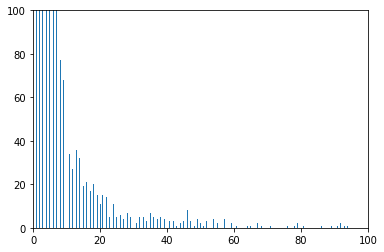

In [55]:
dist = []
for i in all_words_tuple:
    dist.append(i[1])

plt.hist(dist,bins=1000)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
# Most words' frequency is between (1,100)

(8) Keep Words whose Frequency is Between 2 and 100

In [56]:
# Delete words whose frequency is 1 or larger than 100.
# Generate Stopwords
stopwords = []
selected_words_freq = []
selected_words = []
for i in all_words_tuple:
    if 1<i[1]<=100:
        selected_words_freq.append(i)
        selected_words.append(i[0])
    else:
        stopwords.append(i[0])

## II. Data Visualization

<li> Number of Tweets Trump Posted in Each Hour
<li> Number of Tweets Trump Posted in Each Month
<li> Length-Frequency image
<li> Word Covariance Image
<li> Wordcloud

1. Number of Tweets Trump Posted in Each Hour

In [57]:
df_matched['hour_of_day'] = df_matched['date'].apply(lambda x:datetime.datetime.strftime(x,'%H'))
hour_grouped = df_matched.groupby('hour_of_day')
hour_grouped['hour_of_day']
df_1 = df_matched.groupby('hour_of_day').count()
df_2 = df_1['tweetid']
df_2.to_csv("number of tweets in hour.csv")
datafile = './number of tweets in hour.csv'
df_2 = pd.read_csv(datafile,header=None,names = ['hour of day','number of Tweets'])

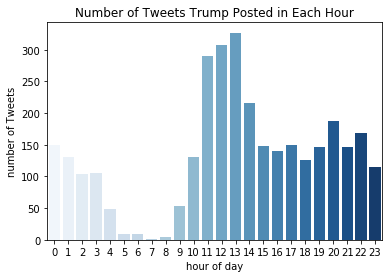

In [58]:
import seaborn as sns
ax1 = sns.barplot("hour of day", y="number of Tweets", data=df_2, palette="Blues")
ax1.set_title("Number of Tweets Trump Posted in Each Hour", fontsize = 'large')
fig  = ax1.get_figure()
fig.savefig('Number of Tweets Trump Posted in Each Hour')

2. Number of Tweets Trump Posted in Each Month

In [59]:
df_matched['month_of_year'] = df_matched['date'].apply(lambda x:datetime.datetime.strftime(x,'%Y%m'))
month_grouped = df_matched.groupby('month_of_year')
month_grouped['month_of_year']
df_3 = df_matched.groupby('month_of_year').count()
df_4 = df_3['tweetid']
df_4.to_csv("number of tweets in month.csv")
datafile = './number of tweets in month.csv'
df_4 = pd.read_csv(datafile,header=None,names = ['month of year','number of Tweets'])

In [60]:
# drop month December
df_5 = df_4.drop(12)

In [61]:
def year(x):
        x = x - 200000
        return x

In [62]:
df_5['month of year'] = df_5['month of year'].apply(lambda x: year(x))

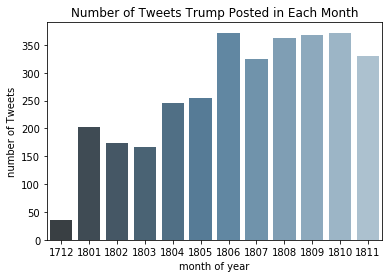

In [63]:
ax2 = sns.barplot("month of year", y="number of Tweets", data = df_5, palette="Blues_d", saturation = 0.5, errwidth = 1.2)
ax2.set_title("Number of Tweets Trump Posted in Each Month", fontsize = 'large')
fig2  = ax2.get_figure()
fig2.savefig('Number of Tweets Trump Posted in Each Month')

3. Length-Frequency image

In [65]:
df_matched['tokenized text'] = df_matched['content'].apply(lambda x: tokenize(x))

In [66]:
def length(text):
    return len(text)
df_matched['text_length'] = df_matched['tokenized text'].apply(lambda x: length(x))

In [69]:
def len_group(x):
    if 0 < x <= 10:
        return '0-10'
    elif 10 < x <= 20:
        return '10-20'
    elif 20 < x <= 30:
        return '20-30'
    elif 30 < x <= 40:
        return '30-40'
    elif 40 < x <= 50:
        return '40-50'
    elif 50 < x <= 60:
        return '50-60'
    elif x > 60:
        return '60-'
    
df_matched['Tweets_Length_Groups'] = df_matched['text_length'].apply(lambda x: len_group(x))    
Tweets_Length_Group = df_matched.groupby('Tweets_Length_Groups').count()

In [70]:
df_6 = Tweets_Length_Group['tweetid']

In [71]:
df_6.to_csv("number of words in each tweet.csv")
datafile = './number of words in each tweet.csv'
df_6 = pd.read_csv(datafile, header = None, names = ['Tweets Length Groups','Number of Tweets'] )

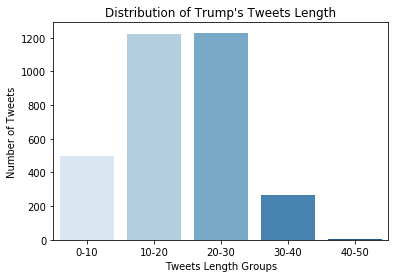

In [72]:
ax1 = sns.barplot("Tweets Length Groups", y="Number of Tweets", data = df_6, palette="Blues")
ax1.set_title("Distribution of Trump's Tweets Length", fontsize = 'large')
fig = ax1.get_figure()
fig.savefig("Distribution of Trump's Tweets Length")

4. Word Covariance Image

In [73]:
!pip install gensim

In [169]:
def get_high_freq(x):
    a = []
    for i in x:
        if 20<=all_words_freq[i]<=200 and len(i)>2:
            a.append(i)
    return a

df['high_freq_word'] = df['tokenized text'].apply(lambda x:get_high_freq(x))

In [176]:
sentence = []
for i in range(3214):
    try:
        sentence.append(df['high_freq_word'][i])
    except:
        continue

In [177]:
sentence

[['dollars',
  'tariffs',
  'china',
  'long',
  'way',
  'companies',
  'tariffs',
  'make',
  'country',
  'ever'],
 ['when',
  'illegal',
  'witch',
  'hunt',
  'one',
  'many',
  'ever',
  'one',
  'collusion',
  'russia'],
 ['ever',
  'see',
  'investigation',
  'crime',
  'time',
  'mueller',
  'angry',
  'democrats',
  'even',
  'looking',
  'crooked',
  'hillary',
  'clinton',
  'democrats',
  'total'],
 ['companies', 'big', 'country', 'companies', 'including', 'new'],
 ['new',
  'good',
  'jobs',
  'jobs',
  'coming',
  'back',
  'america',
  'like',
  'congratulations'],
 ['would', 'amp', 'get', 'congress', 'countries', 'president'],
 ['many',
  'years',
  'tariffs',
  'coming',
  'country',
  'tax',
  'coming',
  'many',
  'would'],
 ['said', 'would', 'back', 'hillary', 'said'],
 ['what', 'https'],
 ['day', 'hillary', 'clinton', 'president'],
 ['trump', 'will', 'cnn', 'ever', 'border'],
 ['trump', 'get', 'our', 'security'],
 ['trump', 'jobs', 'united', 'states', 'back', 'bil

In [178]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [179]:
model = Word2Vec(sentence, min_count=1)

In [180]:
print(model)

Word2Vec(vocab=192, size=100, alpha=0.025)


/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


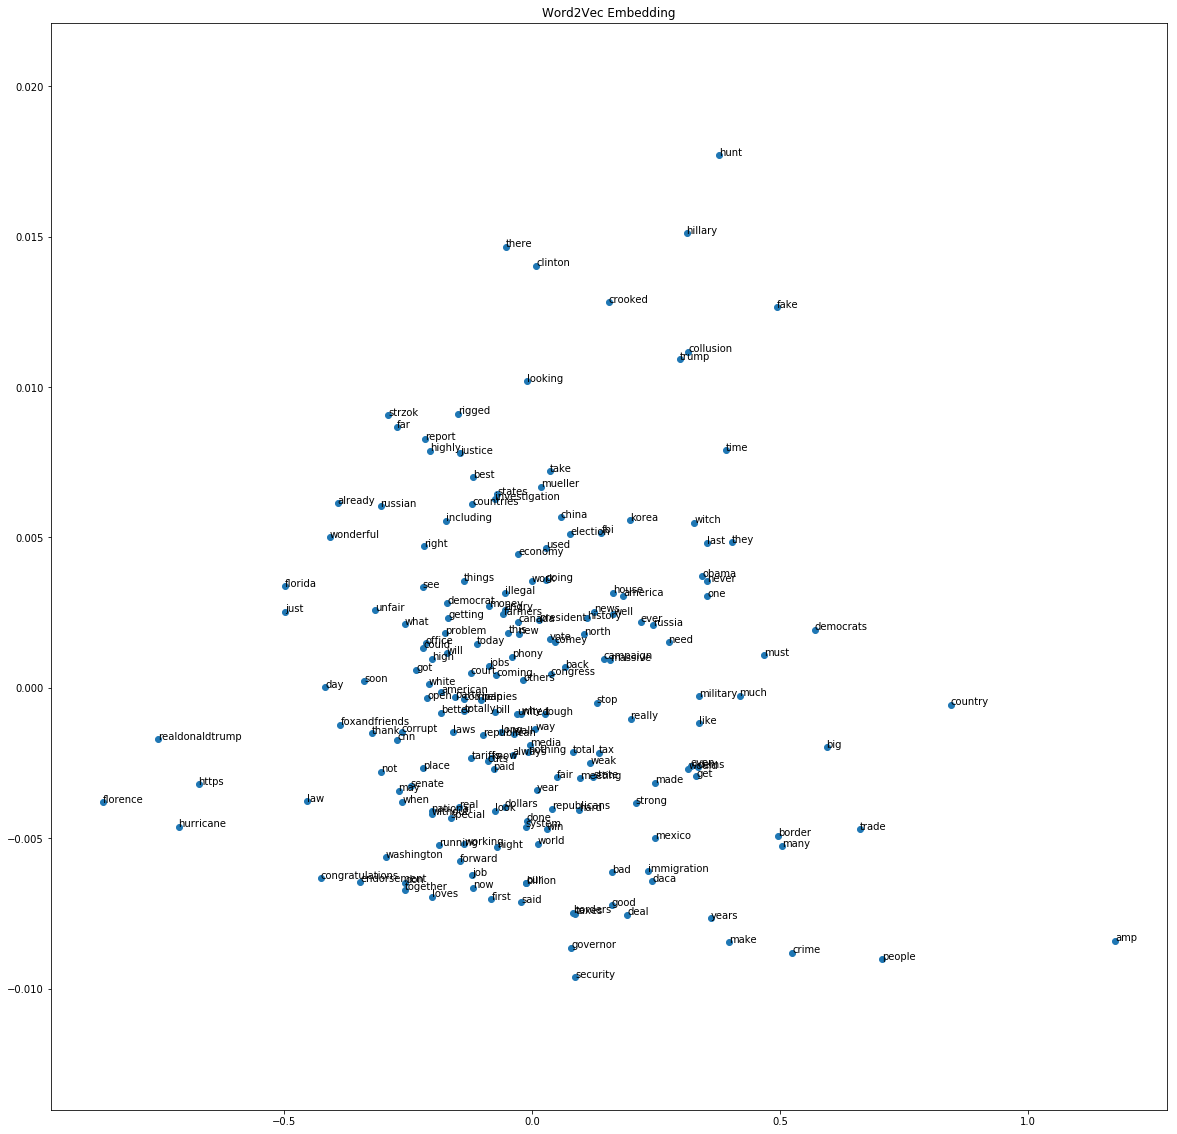

In [181]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title('Word2Vec Embedding')
plt.savefig("./word_embedding.jpg")
plt.show()

5. Wordcloud

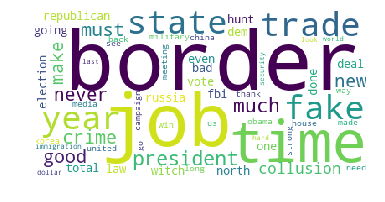

In [93]:
cloud = []
for i in selected_words_freq:
    j = (i[0]+' ')*i[1]
    cloud.append(j)
%matplotlib inline
text = ' '.join(cloud)
wordcloud = WordCloud(background_color='white',max_words=60, collocations=False).generate(text)
plt.axis('off')
plt.imshow(wordcloud)

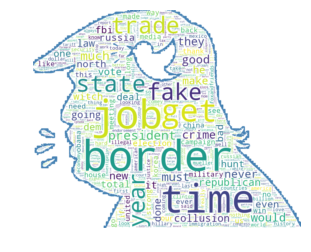

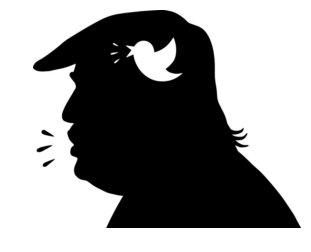

In [101]:
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join("Trump1.jpg")))




wc = WordCloud(background_color='white',max_words=2000, mask=alice_mask, collocations=False, stopwords=stopwords, contour_width=3, contour_color='steelblue')


# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join("Trump.jpg"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.savefig('Trump_wordcloud')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

## III. Modelling

In [102]:
import os
import time
import string
import pickle

from operator import itemgetter

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report as clsr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split as tts
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# The codes below in this cell are modified from the codes on 
# https://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html

def timeit(func):
   
    def wrapper(*args, **kwargs):
        start  = time.time()
        result = func(*args, **kwargs)
        delta  = time.time() - start
        return result, delta
    return wrapper


def identity(arg):
    
    return arg

########### Text Mining ############
class NLTKPreprocessor(BaseEstimator, TransformerMixin):
    

    def __init__(self, stopwords=None, punct=None, lower=True, strip=True):
        
        self.lower      = lower
        self.strip      = strip
        self.stopwords  = set(stopwords) if stopwords else set(sw.words('english'))
        self.punct      = set(punct) if punct else set(string.punctuation)
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        
        return self

    def inverse_transform(self, X):
        
        return X

    def transform(self, X):
        
        return [
            list(self.tokenize(doc)) for doc in X
        ]

    def tokenize(self, document):
        
        # Break the document into sentences
        for sent in sent_tokenize(document):
            # Break the sentence into part of speech tagged tokens
            for token, tag in pos_tag(wordpunct_tokenize(sent)):
                # Apply preprocessing to the token
                token = token.lower() if self.lower else token
                token = token.strip() if self.strip else token
                token = token.strip('_') if self.strip else token
                token = token.strip('*') if self.strip else token

                # If punctuation or stopword, ignore token and continue
                if token in self.stopwords or all(char in self.punct for char in token):
                    continue

                # Lemmatize the token and yield
                lemma = self.lemmatize(token, tag)
                yield lemma

    def lemmatize(self, token, tag):
        
        tag = {
            'N': wn.NOUN,
            'V': wn.VERB,
            'R': wn.ADV,
            'J': wn.ADJ
        }.get(tag[0], wn.NOUN)

        return self.lemmatizer.lemmatize(token, tag)


################ Building model ##############
@timeit
def build_and_evaluate(X, y, classifier=SGDClassifier, outpath=None, verbose=True):
    
    @timeit
    def build(classifier, X, y=None):
        
        if isinstance(classifier, type):
            classifier = classifier()

        model = Pipeline([
            ('preprocessor', NLTKPreprocessor(stopwords = stopwords)),
            ('vectorizer', TfidfVectorizer(stop_words=stopwords,tokenizer=identity, preprocessor=None, lowercase=False)),
            ('classifier', classifier),
        ])

        model.fit(X, y)
        return model

    # Label encode the targets
    labels = LabelEncoder()
    y = labels.fit_transform(y)

    # Begin evaluation
    if verbose: print("Building for evaluation")
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
    model, secs = build(classifier, X_train, y_train)

    if verbose: print("Evaluation model fit in {:0.3f} seconds".format(secs))
    if verbose: print("Classification Report:\n")

    y_pred = model.predict(X_test)
    print(clsr(y_test, y_pred, target_names=labels.classes_))

    if verbose: print("Building complete model and saving ...")
    model, secs = build(classifier, X, y)
    model.labels_ = labels

    if verbose: print("Complete model fit in {:0.3f} seconds".format(secs))

    if outpath:
        with open(outpath, 'wb') as f:
            pickle.dump(model, f)

        print("Model written out to {}".format(outpath))

    return model


def show_most_informative_features(model, text=None, n=20):
    
    # Extract the vectorizer and the classifier from the pipeline
    vectorizer = model.named_steps['vectorizer']
    classifier = model.named_steps['classifier']

    # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {} model.".format(
                classifier.__class__.__name__
            )
        )

    if text is not None:
        # Compute the coefficients for the text
        tvec = model.transform([text]).toarray()
    else:
        # Otherwise simply use the coefficients
        tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], vectorizer.get_feature_names()),
        key=itemgetter(0), reverse=True
    )

    topn  = zip(coefs[:n], coefs[:-(n+1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append("Classified as: {}".format(model.predict([text])))
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(cp, fnp, cn, fnn)
        )

    return "\n".join(output)



/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [103]:
df_1 = df[df['_1_interval_tag'].notnull()]
df_2 = df[df['_3_interval_tag'].notnull()]
df_3 = df[df['_5_interval_tag'].notnull()]
df_4 = df[df['_10_interval_tag'].notnull()]
df_5 = df[df['_15_interval_tag'].notnull()]
df_6 = df[df['_30_interval_tag'].notnull()]

In [104]:
X1 = []
for i in range(len(df_1)):
    text = ' '.join(df_1.iloc[i]['tokenized text'])
    X1.append(text)
X2 = []
for i in range(len(df_2)):
    text = ' '.join(df_2.iloc[i]['tokenized text'])
    X2.append(text)
X3 = []
for i in range(len(df_3)):
    text = ' '.join(df_3.iloc[i]['tokenized text'])
    X3.append(text)
X4 = []
for i in range(len(df_4)):
    text = ' '.join(df_4.iloc[i]['tokenized text'])
    X4.append(text)
X5 = []
for i in range(len(df_5)):
    text = ' '.join(df_5.iloc[i]['tokenized text'])
    X5.append(text)
X6 = []
for i in range(len(df_6)):
    text = ' '.join(df_6.iloc[i]['tokenized text'])
    X6.append(text)

In [105]:
df_1[['_1_interval_tag']] = df_1[['_1_interval_tag']].astype(str)
df_2[['_3_interval_tag']] = df_2[['_3_interval_tag']].astype(str)
df_3[['_5_interval_tag']] = df_3[['_5_interval_tag']].astype(str)
df_4[['_10_interval_tag']] = df_4[['_10_interval_tag']].astype(str)
df_5[['_15_interval_tag']] = df_5[['_15_interval_tag']].astype(str)
df_6[['_30_interval_tag']] = df_6[['_30_interval_tag']].astype(str)

/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [106]:
y1 = df_1['_1_interval_tag']
y2 = df_2['_3_interval_tag']
y3 = df_3['_5_interval_tag']
y4 = df_4['_10_interval_tag']
y5 = df_5['_15_interval_tag']
y6 = df_6['_30_interval_tag']
# LinearSVC Model
# model1,secs1 = build_and_evaluate(X1,y1,classifier=svm.LinearSVC)
# model2,secs2 = build_and_evaluate(X2,y2,classifier=svm.LinearSVC)
# model3,secs3 = build_and_evaluate(X3,y3,classifier=svm.LinearSVC)
# model4,secs4 = build_and_evaluate(X4,y4,classifier=svm.LinearSVC)
# model5,secs5 = build_and_evaluate(X5,y5,classifier=svm.LinearSVC)
# model6,secs6 = build_and_evaluate(X6,y6,classifier=svm.LinearSVC)

In [107]:
# MultinomialNB Model
# After performing 3 models, we found MultinamialNB Model is the best.
# Use this to predict
model1,secs1 = build_and_evaluate(X1,y1,classifier=MultinomialNB)
model2,secs2 = build_and_evaluate(X2,y2,classifier=MultinomialNB)
model3,secs3 = build_and_evaluate(X3,y3,classifier=MultinomialNB)
model4,secs4 = build_and_evaluate(X4,y4,classifier=MultinomialNB)
model5,secs5 = build_and_evaluate(X5,y5,classifier=MultinomialNB)
model6,secs6 = build_and_evaluate(X6,y6,classifier=MultinomialNB)

Building for evaluation
Evaluation model fit in 3.200 seconds
Classification Report:



/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       -1.0       0.50      0.66      0.57        83
        0.0       0.00      0.00      0.00         5
        1.0       0.45      0.32      0.38        78

avg / total       0.46      0.48      0.46       166

Building complete model and saving ...
Complete model fit in 1.387 seconds
Building for evaluation
Evaluation model fit in 1.609 seconds
Classification Report:



/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       -1.0       0.44      0.65      0.52        96
        0.0       0.00      0.00      0.00         9
        1.0       0.53      0.36      0.43       114

avg / total       0.47      0.47      0.45       219

Building complete model and saving ...
Complete model fit in 2.438 seconds
Building for evaluation
Evaluation model fit in 2.135 seconds
Classification Report:



/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       -1.0       0.52      0.67      0.59       112
        0.0       0.00      0.00      0.00         4
        1.0       0.49      0.36      0.42       102

avg / total       0.50      0.51      0.50       218

Building complete model and saving ...
Complete model fit in 1.981 seconds
Building for evaluation
Evaluation model fit in 1.426 seconds
Classification Report:



/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       -1.0       0.44      0.49      0.46       101
        0.0       0.00      0.00      0.00         1
        1.0       0.51      0.47      0.49       115

avg / total       0.48      0.47      0.47       217

Building complete model and saving ...
Complete model fit in 1.742 seconds
Building for evaluation
Evaluation model fit in 1.503 seconds
Classification Report:



/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))


             precision    recall  f1-score   support

       -1.0       0.55      0.63      0.59       109
        0.0       0.55      0.46      0.50       106

avg / total       0.55      0.55      0.55       215

Building complete model and saving ...
Complete model fit in 1.770 seconds
Building for evaluation
Evaluation model fit in 1.296 seconds
Classification Report:



/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       -1.0       0.52      0.42      0.47       109
        0.0       0.00      0.00      0.00         1
        1.0       0.49      0.59      0.54       101

avg / total       0.50      0.50      0.50       211

Building complete model and saving ...
Complete model fit in 2.028 seconds


In [108]:
# SGDClassifier Model
# model1,secs1 = build_and_evaluate(X1,y1)
# model2,secs2 = build_and_evaluate(X2,y2)
# model3,secs3 = build_and_evaluate(X3,y3)
# model4,secs4 = build_and_evaluate(X4,y4)
# model5,secs5 = build_and_evaluate(X5,y5)
# model6,secs6 = build_and_evaluate(X6,y6)

In [109]:
# Get informative words
print('1 Min')
print(show_most_informative_features(model1, text=None, n=200))
print('3 Min')
print(show_most_informative_features(model2, text=None, n=20))
print('5 Min')
print(show_most_informative_features(model3, text=None, n=20))
print('10 Min')
print(show_most_informative_features(model4, text=None, n=20))
print('15 Min')
print(show_most_informative_features(model5, text=None, n=20))
print('30 Min')
print(show_most_informative_features(model6, text=None, n=20))

1 Min
-5.8545            get    -8.0920           your
-5.9300             go    -8.0920              x
-5.9538         border    -8.0920          write
-6.0411           make    -8.0920        worried
-6.1032           fake    -8.0920        witness
-6.1095      president    -8.0920        windows
-6.1195          trade    -8.0920        welcome
-6.1201           well    -8.0920      watergate
-6.1281          state    -8.0920          waste
-6.1346              a    -8.0920         wanted
-6.1452           they    -8.0920         walker
-6.1495           good    -8.0920             vp
-6.1605           vote    -8.0920          voted
-6.1720            law    -8.0920          value
-6.2227          north    -8.0920          usual
-6.2347           year    -8.0920      unrelated
-6.2483           deal    -8.0920     unredacted
-6.2564           look    -8.0920         unlike
-6.2707          would    -8.0920     understand
-6.2740            job    -8.0920unconstitutional
-6.2889      

## IV. GUI

In [116]:
a = show_most_informative_features(model1, text=None,n=500)
pos_word = []
neg_word = []
for i in a.split('\n'):
    j = i.split()
    if len(j)==4:
        if len(j[1])>2:
            pos_word.append(j[1])
        if len(j[3])>2:
            neg_word.append(j[3])
    #print(len(j))

In [117]:
def get_pos_neg(text):
    pos=[]
    neg=[]
    words = word_tokenize(text)  #tokenize
    lowercase_words = [word.lower() for word in words if word not in stopwords and word.isalpha()]
    for i in lowercase_words:
        if i in pos_word:
            pos.append(i)
        elif i in neg_word:
            neg.append(i)
    return pos,neg

In [130]:
import tkinter
import tkinter.font as tkFont

class Predict(object):
    def __init__(self):
        self.root = tkinter.Tk()
        self.root.title("Trump's Twitter VS Stock Price")
        #Set frame
        self.fm1 = tkinter.Frame(self.root)
        self.fm2 = tkinter.Frame(self.root)
        #Set front
        self.ft1 = tkFont.Font(size = 16,weight = tkFont.BOLD)
        self.ft2 = tkFont.Font(size = 14)
        #Set entry,label and button
        self.input = tkinter.Entry(self.fm1,width = 40)
        self.label = tkinter.Label(self.fm1, text="Please input Trump's tweet here:",font =self.ft2)
        self.image1 = tkinter.PhotoImage(file="/Users/zhaotingting/Desktop/Final_Project_A_and_his_friends/Code&Data/pics_GUI/question mark1.gif")
        self.image2 = tkinter.PhotoImage(file="/Users/zhaotingting/Desktop/Final_Project_A_and_his_friends/Code&Data/pics_GUI/up.gif")
        self.image3 = tkinter.PhotoImage(file="/Users/zhaotingting/Desktop/Final_Project_A_and_his_friends/Code&Data/pics_GUI/same.gif")
        self.image4 = tkinter.PhotoImage(file="/Users/zhaotingting/Desktop/Final_Project_A_and_his_friends/Code&Data/pics_GUI/down.gif")
        self.photo1 = tkinter.Label(self.fm2, image=self.image1)
        self.display_info = tkinter.Label(self.fm2, text="Will the stock price increase or decrease?", font = self.ft1, width=40,height = 2)
        self.result_button = tkinter.Button(self.fm2, width = 8,command = self.get_prediction,text = "Predict",font =self.ft2)

    #Arrange
    def gui_arrang(self):
        self.label.pack(anchor=tkinter.NW)
        self.input.pack()
        self.fm1.pack()

        self.photo1.pack()
        self.display_info.pack()
        self.result_button.pack()
        self.fm2.pack(pady=10)
  
    #Get prediction
    def get_prediction(self):
        self.text = self.input.get()
        yhat = model1.predict([self.text])
        value = model1.labels_.inverse_transform(yhat)
        pos,neg = get_pos_neg(self.text)
        
        if value[0]=='1.0':
            pre = 'increase!'
            #Change the picture
            self.photo1.configure(image = self.image2)
        elif value[0]=='0.0':
            pre = 'not change.'
            self.photo1.configure(image = self.image3)
        elif value[0]=='-1.0':
            pre = 'decrease!'
            self.photo1.configure(image = self.image4)
        if pos ==None:
            pos = 'None!'
        if neg ==None:
            neg = 'None!'
        
        #Show the results
        self.display_info.configure(text = 'The stock price may '+pre)
        #Update the picture
        self.root.update_idletasks()
        return value[0]


def main():
    FL = Predict()
    FL.gui_arrang()
    tkinter.mainloop()
    pass

if __name__ == "__main__":
    main()



/Users/zhaotingting/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
